In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sys.path.append("../scripts")
from eda import eda as eda

In [10]:
eda = eda(data)
def imports(data):
    data_imported = pd.read_csv(data)
    return data_imported

In [4]:
train = imports("../data/train.csv")
test = imports("../data/test.csv")
store = imports("../data/store.csv")
train.name = 'Train'
test.name = 'test'
store.name = 'store'

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\2007837675.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_imported = pd.read_csv(data)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train.Date.dt.year
train['Month'] = train.Date.dt.month
train['Day'] = train.Date.dt.day
train['WeekOfYear'] = train.Date.dt.weekofyear

train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\1877852999.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['WeekOfYear'] = train.Date.dt.weekofyear


count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118


train.name = 'Train'
test.name = 'test'
store.name = 'store'
def data_shape(data):
    print(data.name,'shape:',data.shape)

# function to ckeck the size of a dataset
def data_size(data):
    print(data.name,'size:',data.size)

# function to ckeck the information of a dataset
def data_info(data):
    print(data.name,'information:')
    print('********')
    print(data.info())
    print('********')   
    
# function to get all unique values in the categorical variables
def unique_val(data):
    cols = data.columns
    for i in cols:
        if data[i].dtype == 'O':
            print('Unique values in',i,'are',data[i].unique())
            print('----------------------------------------------')

# function to ckeck for missing values
def missing_val(data):
    print('Sum of missing values in', data.name)
    print('------------------------------')
    print(data.isnull().sum())
    print('------------------------------')
    
"""
VISUALIZATION
"""
def fig_att2(title, title_x, title_y, size, size_xy, weight):
    plt.title(title, size=size, weight=weight)
    plt.xlabel(title_x, size=size_xy, weight=weight)
    plt.ylabel(title_y, size=size_xy, weight=weight)
    
def fig_size(x, y):
    plt.figure(figsize=(x,y))
    
def get_value(figure):
    for p in figure.patches:
        figure.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')
        
def fig_att(figure, title, title_x, title_y, size, size_xy, weight):
    figure.set_title(title, size=size, weight=weight)
    figure.set_xlabel(title_x, size=size_xy, weight=weight)
    figure.set_ylabel(title_y, size=size_xy, weight=weight)
    


def rotate(figure, rotation):
    for item in figure.get_xticklabels():
        item.set_rotation(rotation)
def save(name):
    plt.savefig(f"{name}.png")

Checking for Shape

In [11]:
for i in [train,test,store]:
    eda.data_shape(i)
    eda.data_size(i)
    print('*****')

Train shape: (1017209, 14)
Train size: 14240926
*****
test shape: (41088, 8)
test size: 328704
*****
store shape: (1115, 10)
store size: 11150
*****


In [12]:
train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [13]:
test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [14]:
train['StateHoliday'].replace({'0':'o',0:'o'}, inplace=True)
test['StateHoliday'].replace({'0':'o'}, inplace=True)

In [15]:
for i in [train,test,store]:
    eda.missing_val(i)

Sum of missing values in Train
------------------------------
Store                   0
DayOfWeek               0
Date                    0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64
------------------------------
Sum of missing values in test
------------------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
------------------------------
Sum of missing values in store
------------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo

In [16]:
#handling missing values
missing_cols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for cols in missing_cols:
    store[cols].fillna(store[cols].mode()[0], inplace=True)
    
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


Are the promotions distributed similarly between these two groups?

In [17]:
train.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [18]:
test.Promo.value_counts()

0    24824
1    16264
Name: Promo, dtype: int64

###### With the analysis through the value_counts, they are similarly distributed

Check & compare sales behavior before, during and after holidays

In [19]:
#Merging train and store data for better exploration
train_store = pd.merge(train, store, on='Store')
train_store.name = 'Combined'

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


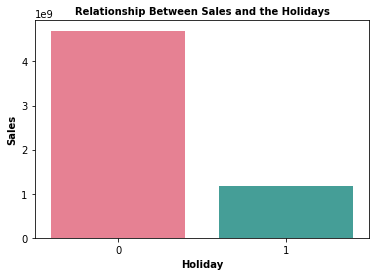

In [21]:
holidays = train.groupby('SchoolHoliday', sort=False)['Sales'].agg(['sum'])
holidays = holidays.reset_index()

#barplot for visualization
ax = sns.barplot('SchoolHoliday', 'sum', 
                 palette='husl', data=holidays)

#setting the figure parameters
eda.fig_att(ax, "Relationship Between Sales and the Holidays", 
        "Holiday", "Sales", 10, 10, "bold")

eda.save('holidays')
plt.show()

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


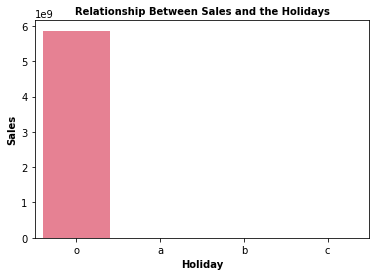

In [22]:
state_holidays = train.groupby('StateHoliday', sort=False)['Sales'].agg(['sum'])
state_holidays = state_holidays.reset_index()

#barplot for visualization
ax = sns.barplot('StateHoliday', 'sum', 
                 palette='husl', data=state_holidays)

#setting the figure parameters
eda.fig_att(ax, "Relationship Between Sales and the Holidays", 
        "Holiday", "Sales", 10, 10, "bold")

eda.save('holidays3')
plt.show()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Store            1017209 non-null  int64         
 1   DayOfWeek        1017209 non-null  int64         
 2   Date             1017209 non-null  datetime64[ns]
 3   Sales            1017209 non-null  int64         
 4   Customers        1017209 non-null  int64         
 5   Open             1017209 non-null  int64         
 6   Promo            1017209 non-null  int64         
 7   StateHoliday     1017209 non-null  object        
 8   SchoolHoliday    1017209 non-null  int64         
 9   Year             1017209 non-null  int64         
 10  Month            1017209 non-null  int64         
 11  Day              1017209 non-null  int64         
 12  WeekOfYear       1017209 non-null  int64         
 13  SalePerCustomer  844340 non-null   float64       
dtypes:

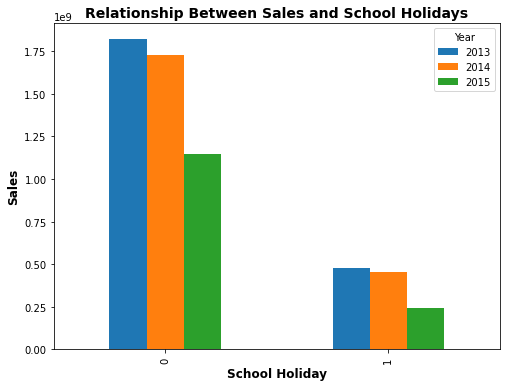

In [25]:
ax = pd.crosstab(train.Year, train.SchoolHoliday, values= train.Sales, 
                 aggfunc= np.sum).T.plot(kind='bar', figsize=(8,6))
#setting the figure parameters
eda.fig_att(ax, "Relationship Between Sales and School Holidays", 
        "School Holiday", "Sales", 14, 12, "bold")

eda.save('holidays_2')
plt.show()

Seasonality

In [27]:
season = train[['Date','Sales']]
season = season.set_index('Date')
season.head()

,Sales
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


### PLOT FOR DAY

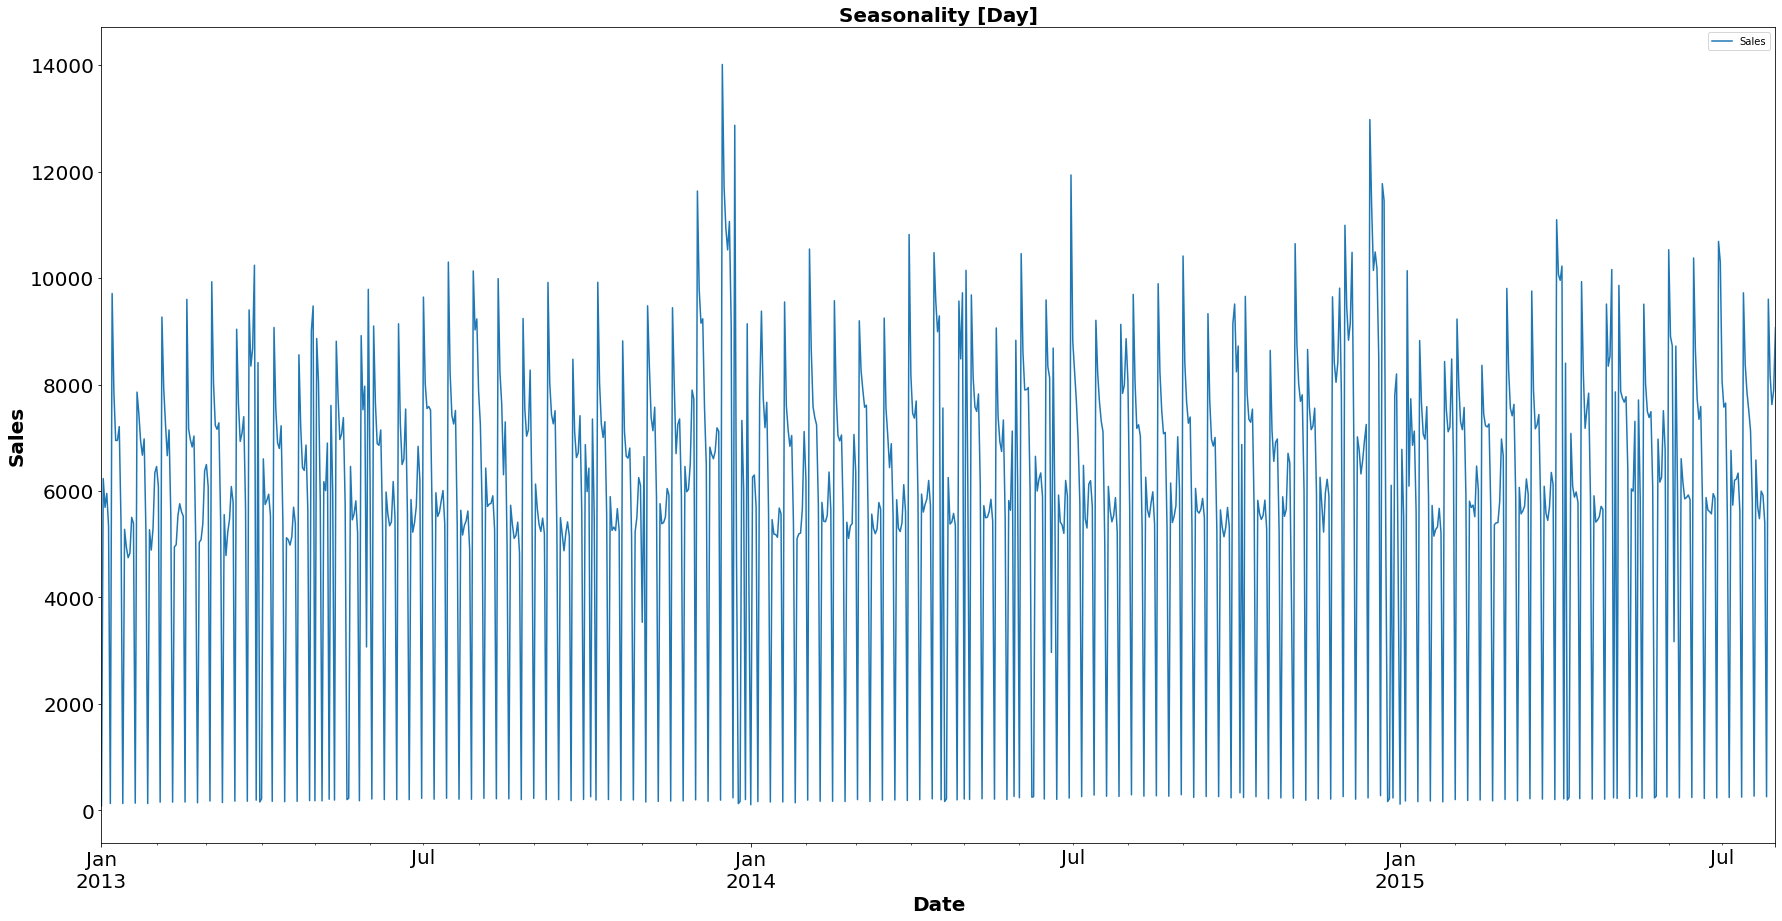

In [28]:
season = season.resample('D').mean()
ax = season.plot(figsize=(30,15), fontsize=20)

#setting the figure parameters
eda.fig_att(ax, "Seasonality [Day]", 
        "Date", "Sales", 20, 20, "bold")

#saving the figure
plt.savefig('day.png')
plt.show()

### PLOT FOR WEEK

In [34]:
season_behavior = train.groupby('StateHoliday', sort=False)['Sales'].agg(['sum'])
season_behavior.columns = ['Sales']
season_behavior

,Sales
StateHoliday,
o,5865164768
a,5890305
b,1433744
c,691806


In [35]:
season_behavior = season_behavior.drop('o')
season_behavior

,Sales
StateHoliday,
a,5890305
b,1433744
c,691806


C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


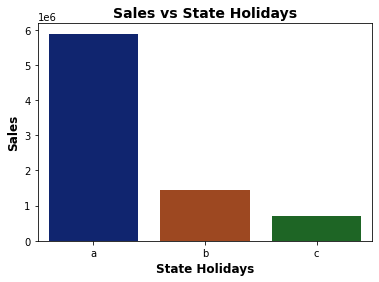

In [36]:
season_behavior = season_behavior.reset_index()

#barplot sublopts for visualization - Sales and customer
ax = sns.barplot('StateHoliday', 'Sales', palette='dark', 
                 data=season_behavior)

#setting the figure parameters
eda.fig_att(ax, "Sales vs State Holidays", 
        "State Holidays", "Sales", 14, 12, "bold")

#saving the figure
eda.save('season_behavior')
plt.show()

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Store            1017209 non-null  int64         
 1   DayOfWeek        1017209 non-null  int64         
 2   Date             1017209 non-null  datetime64[ns]
 3   Sales            1017209 non-null  int64         
 4   Customers        1017209 non-null  int64         
 5   Open             1017209 non-null  int64         
 6   Promo            1017209 non-null  int64         
 7   StateHoliday     1017209 non-null  object        
 8   SchoolHoliday    1017209 non-null  int64         
 9   Year             1017209 non-null  int64         
 10  Month            1017209 non-null  int64         
 11  Day              1017209 non-null  int64         
 12  WeekOfYear       1017209 non-null  int64         
 13  SalePerCustomer  844340 non-null   float64       
dtypes:

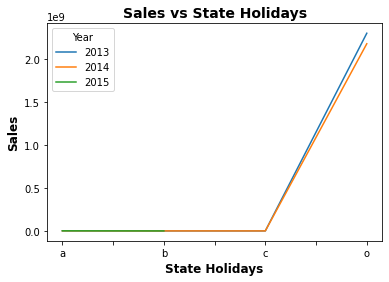

In [38]:
ax = pd.crosstab(train.Year,train.StateHoliday,
                 values= train.Sales, aggfunc= np.sum).T.plot()
#setting the figure parameters
eda.fig_att(ax, "Sales vs State Holidays", 
        "State Holidays", "Sales", 14, 12, "bold")

#saving the figure
eda.save('season_behavior2')
plt.show()

#### SALES AND CUSTOMER CORRELATION

Correlation between the Sales & Customers = 0.8947107733017028


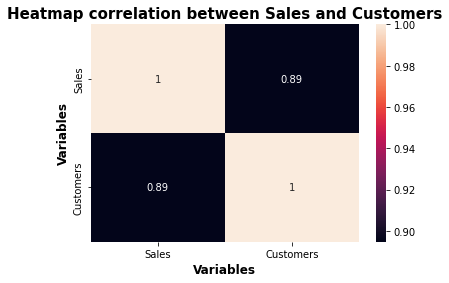

In [39]:
corr = train['Sales'].corr(train['Customers'])
print(f"Correlation between the Sales & Customers = {corr}")

# using heatmap to visualize correlation
ax = sns.heatmap(train[['Sales', 'Customers']].corr(), annot=True)

# setting the parameters
eda.fig_att(ax, "Heatmap correlation between Sales and Customers", 
        "Variables", "Variables", 15, 12, "bold")
eda.save("correlation")
plt.show()

How does promotion affects Sales?

In [40]:
promo = train.groupby('Promo', sort=False)['Sales', 'Customers'].agg(['sum'])
promo.columns = ['Sales', 'Customers']
promo

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\2865214703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo = train.groupby('Promo', sort=False)['Sales', 'Customers'].agg(['sum'])


,Sales,Customers
Promo,,
1,3101206286,318263948
0,2771974337,325777807


C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


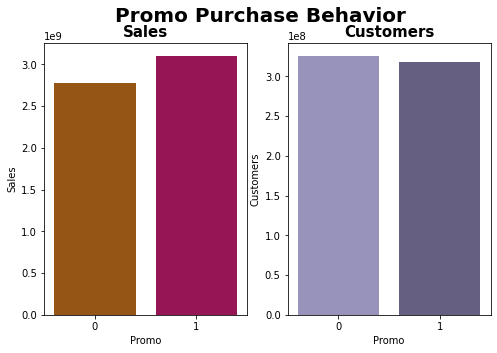

In [42]:
promo = promo.reset_index()

fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Promo Purchase Behavior', size=20, weight='bold')

sns.barplot('Promo', 'Sales', palette='brg_r', 
             data=promo, ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

sns.barplot('Promo', 'Customers', palette='Purples_d', 
             data=promo, ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
eda.save('promo')
plt.show()

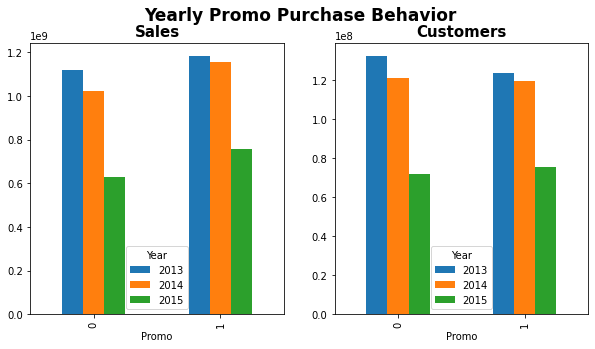

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Yearly Promo Purchase Behavior', size=17, weight='bold')

pd.crosstab(train.Year, train.Promo, values= train.Sales, 
            aggfunc= np.sum).T.plot(kind='bar', ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

pd.crosstab(train.Year, train.Promo, values= train.Customers, 
            aggfunc= np.sum).T.plot(kind='bar', ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
eda.save('promo2')
plt.show()

In [47]:
promo_stores = train_store.groupby(['StoreType', 'Promo'])['Sales','Customers'].agg(['sum'])
promo_stores.columns = ['Sales', 'Customers']
promo_stores

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\1196907128.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo_stores = train_store.groupby(['StoreType', 'Promo'])['Sales','Customers'].agg(['sum'])


Sales  Customers
StoreType Promo                       
a         0      1466971549  180276608
          1      1698363310  183264826
b         0        92061910   18685985
          1        67169485   12779636
c         0       375186657   47222206
          1       408034769   44907499
d         0       837754221   79593008
          1       927638722   77311987

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


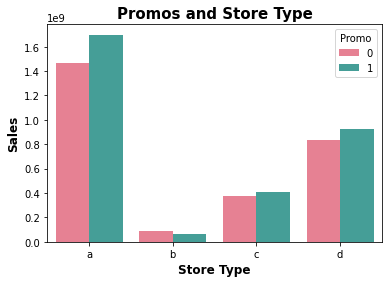

In [49]:
promo_stores = promo_stores.reset_index()

#barplot for visualization
ax = sns.barplot('StoreType', 'Sales', hue='Promo',
                 palette='husl', data=promo_stores)

#setting the figure parameters
eda.fig_att(ax, "Promos and Store Type", 
        "Store Type", "Sales", 15, 12, "bold")

eda.save('promo_stores')
plt.show()

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


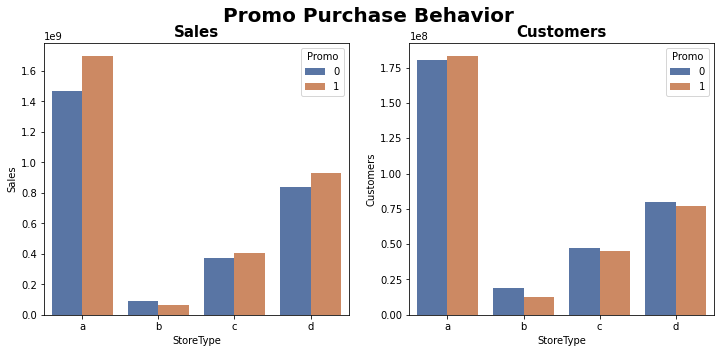

In [50]:
promo_stores = promo_stores.reset_index()

#barplot sublopts for visualization - Sales and customer
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Promo Purchase Behavior', size=20, weight='bold')

sns.barplot('StoreType', 'Sales', palette='deep', hue='Promo',
             data=promo_stores, ax=axes[0])
axes[0].set_title('Sales', size=15, weight='bold')

sns.barplot('StoreType', 'Customers', palette='deep', hue='Promo',
             data=promo_stores, ax=axes[1])
axes[1].set_title('Customers', size=15, weight='bold')

#saving the figure
eda.save('promo_stores2')
plt.show()

In [51]:
promo2_stores = train_store.groupby(['StoreType', 'Promo2'])['Sales','Customers'].agg(['sum'])
promo2_stores.columns = ['Sales', 'Customers']
promo2_stores

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\2969036133.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  promo2_stores = train_store.groupby(['StoreType', 'Promo2'])['Sales','Customers'].agg(['sum'])


Sales  Customers
StoreType Promo2                       
a         0       1755740109  207054433
          1       1409594750  156487001
b         0        123336200   23082050
          1         35895195    8383571
c         0        435035980   52461014
          1        348185446   39668691
d         0        797430339   74527993
          1        967962604   82377002

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


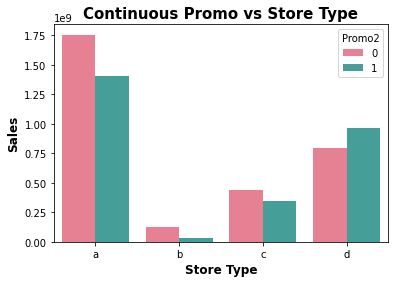

In [53]:
promo2_stores = promo2_stores.reset_index()

#barplot for visualization
ax = sns.barplot('StoreType', 'Sales', hue='Promo2',
                 palette='husl', data=promo2_stores)

#setting the figure parameters
eda.fig_att(ax, "Continuous Promo vs Store Type", 
        "Store Type", "Sales", 15, 12, "bold")

eda.save('promo2_stores')
plt.show()

Checking for Customer trend

In [55]:
open_trend = train.groupby('Date', sort=False)['Sales', 'Customers'].agg(['sum'])
open_trend.columns = ['Sales', 'Customers']
open_trend.head()

C:\Users\Victor Olufemi\AppData\Local\Temp\ipykernel_12628\3447985310.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  open_trend = train.groupby('Date', sort=False)['Sales', 'Customers'].agg(['sum'])


,Sales,Customers
Date,,
2015-07-31,10109742,968620
2015-07-30,8798854,858547
2015-07-29,8499962,828524
2015-07-28,9115073,876092
2015-07-27,10707292,970462


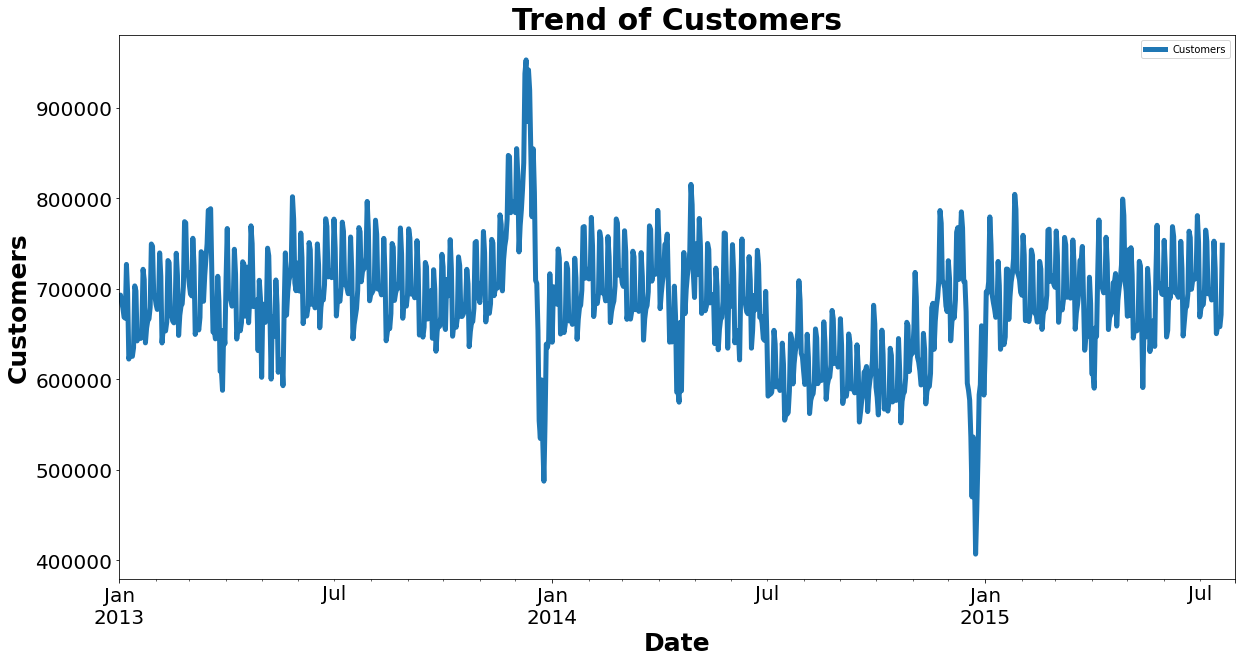

In [57]:
ax = open_trend[['Customers']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)

#setting the figure parameters
eda.fig_att(ax, "Trend of Customers", 
        "Date", "Customers", 30, 25, "bold")

eda.rotate(ax, 0)
eda.save('trend')
plt.show()

In [59]:
week_sales = train_store.groupby(['StoreType', 'DayOfWeek', 'Open'])['Sales'].agg(['sum'])
week_sales.columns = ['Sales']
week_sales.head(10)

Sales
StoreType DayOfWeek Open           
a         1         0             0
                    1     621955243
          2         0             0
                    1     569806300
          3         0             0
                    1     526483032
          4         0             0
                    1     499278350
          5         0             0
                    1     525827656

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


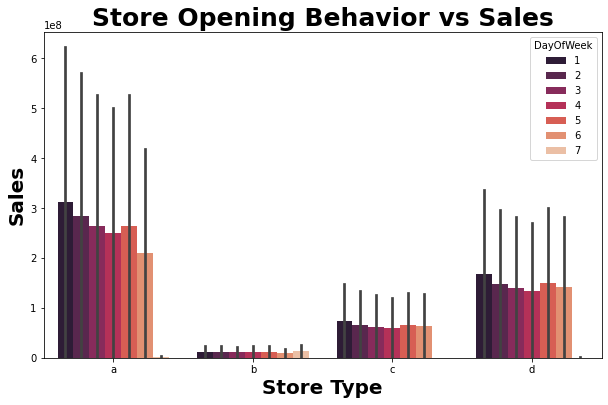

In [60]:
week_sales = week_sales.reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot('StoreType', 'Sales', hue='DayOfWeek',
                 palette='rocket', data=week_sales)

eda.fig_att(ax, "Store Opening Behavior vs Sales", 
        "Store Type", "Sales", 25, 20, "bold")

eda.save('week_sales')
plt.show()

Assortment

In [61]:
assort_sales = train_store.groupby('Assortment')['Sales'].agg(['sum'])
assort_sales.columns = ['Sales']
assort_sales 

,Sales
Assortment,
a,2945750070
b,70946312
c,2856484241


C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


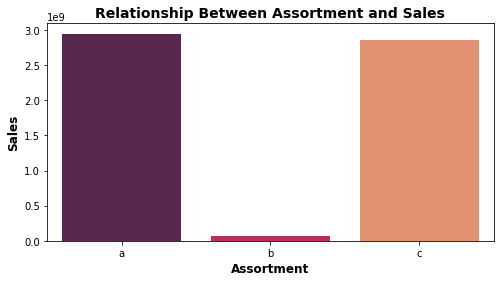

In [63]:
assort_sales = assort_sales.reset_index()

eda.fig_size(8,4)
ax = sns.barplot('Assortment', 'Sales', 
                 palette='rocket', data=assort_sales)

#setting the figure parameters
eda.fig_att(ax, "Relationship Between Assortment and Sales", 
        "Assortment", "Sales", 14, 12, "bold")

eda.save('assort_sales')
plt.show()

In [64]:
# Getting the total sales for each assortment type
assort_sales2 = train_store.groupby(['StoreType','Assortment'])['Sales'].agg(['sum'])
assort_sales2.columns = ['Sales']
assort_sales2 

Sales
StoreType Assortment            
a         a           1870105131
          c           1295229728
b         a             71357761
          b             70946312
          c             16927322
c         a            400260421
          c            382961005
d         a            604026757
          c           1161366186

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


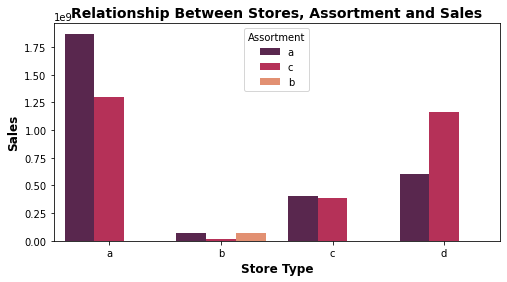

In [66]:
assort_sales2 = assort_sales2.reset_index()

#barplot for visualization
eda.fig_size(8,4)
ax = sns.barplot('StoreType', 'Sales', hue='Assortment',
                 palette='rocket', data=assort_sales2)

eda.fig_att(ax, "Relationship Between Stores, Assortment and Sales", 
        "Store Type", "Sales", 14, 12, "bold")

eda.save('assort_sales2')
plt.show()

C:\Users\Victor Olufemi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


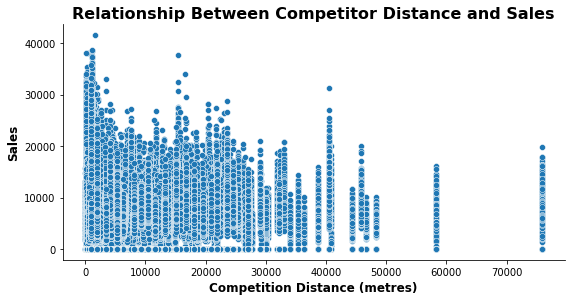

In [67]:
ax = sns.relplot('CompetitionDistance', 'Sales', kind='scatter',
                 height=4, aspect=2, data=train_store)

#setting the figure parameters
eda.fig_att2("Relationship Between Competitor Distance and Sales", 
          "Competition Distance (metres)", "Sales", 16, 12, "bold")

eda.save('comp_sales')
plt.show()

In [68]:
train_store['Distance_In_Kilometer'] = 0.001 * train_store.CompetitionDistance
pd.crosstab(train_store.year, train_store.Distance_In_Kilometer, 
            values=train_store.Sales, aggfunc=np.sum).T.plot(figsize=(10,5))
plt.xlim([1,3])
#setting the figure parameters
fig_att2(" Competitor Distance and Sales", 
          "Distance (Kilometer)", "Sales", 16, 12, "bold")

save('comp_sales2')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'year'